## Applications of Unsupervised learning

* **Recommender systems**, which involve grouping together users with similar viewing patterns in order to recommend similar content.
* **Customer segmentation**, or understanding different customer groups around which to build marketing or other business strategies.
* **Genetics**, for example clustering DNA patterns to analyze evolutionary biology.
* **Anomaly detection**, including fraud detection or detecting defective mechanical parts (i.e., predictive maintenance).
* **Outlier detection** within a data science / data analytics workflow.

# Let's do some unsupervised learning!

**We're doing KMeans clustering**

In [6]:
# let's get some data

In [1]:
import pandas as pd

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_wine()

In [5]:
type(data)

sklearn.utils.Bunch

In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [14]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [15]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [17]:
data['data'].shape

(178, 13)

In [20]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

y = pd.Series(data['target'])

In [22]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
y.unique()

array([0, 1, 2])

In [25]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [28]:
# dataframe of scaled features
X_prep_df = pd.DataFrame(X_prep, columns=data['feature_names'])

In [29]:
from IPython.display import Image
from IPython.core.display import HTML

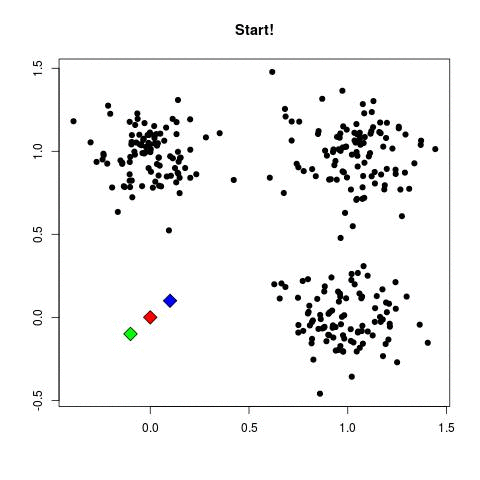

In [30]:
Image("k_means.gif")

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(random_state=1234)

In [38]:
kmeans.cluster_centers_

array([[-4.84417110e-01, -7.00351821e-01, -1.21040122e+00,
        -8.00011646e-01, -1.65489870e-01, -7.62520085e-01,
        -7.59964629e-01,  3.19770238e-01, -1.17142800e+00,
        -6.09430162e-01,  2.08957908e-01, -8.50932705e-01,
        -5.57436408e-01],
       [-7.35477484e-01,  8.13356482e-02, -4.06837479e-01,
        -7.94280943e-02, -5.28297935e-01,  7.54657455e-01,
         6.68152851e-01, -7.01603842e-01,  7.77721643e-01,
        -6.80753574e-01,  3.25934043e-01,  6.16637895e-01,
        -5.92945111e-01],
       [-1.05800485e+00, -4.04894729e-01, -1.96912466e-01,
         6.33883161e-01, -7.33550744e-01, -3.90866171e-01,
        -1.53109902e-01,  3.61882301e-01, -1.96365437e-01,
        -1.02690913e+00,  4.30568144e-01,  3.25804721e-01,
        -8.84574695e-01],
       [ 6.77376912e-02,  1.36609385e+00,  2.08791281e-01,
         5.61140326e-01, -3.93560477e-01, -1.05043553e+00,
        -1.40664557e+00,  1.24500923e+00, -1.08945987e+00,
         2.98906303e-01, -9.60007074e

## What makes a cluster a "good" cluster?

* **Inertia**, Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

* **Silhouette score**, (discuss later), -1 to 1

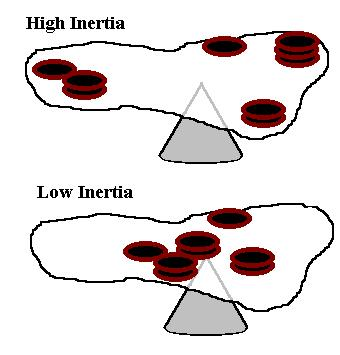

In [43]:
Image("inertia_plate.jpg")

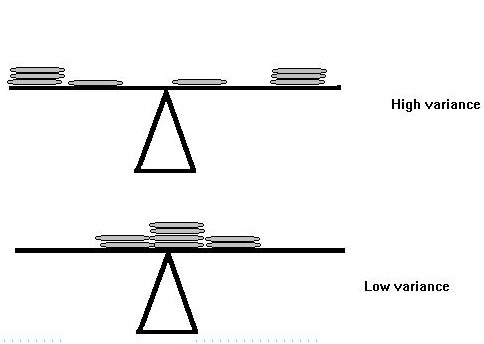

In [44]:
Image("inertia_scale.jpg")

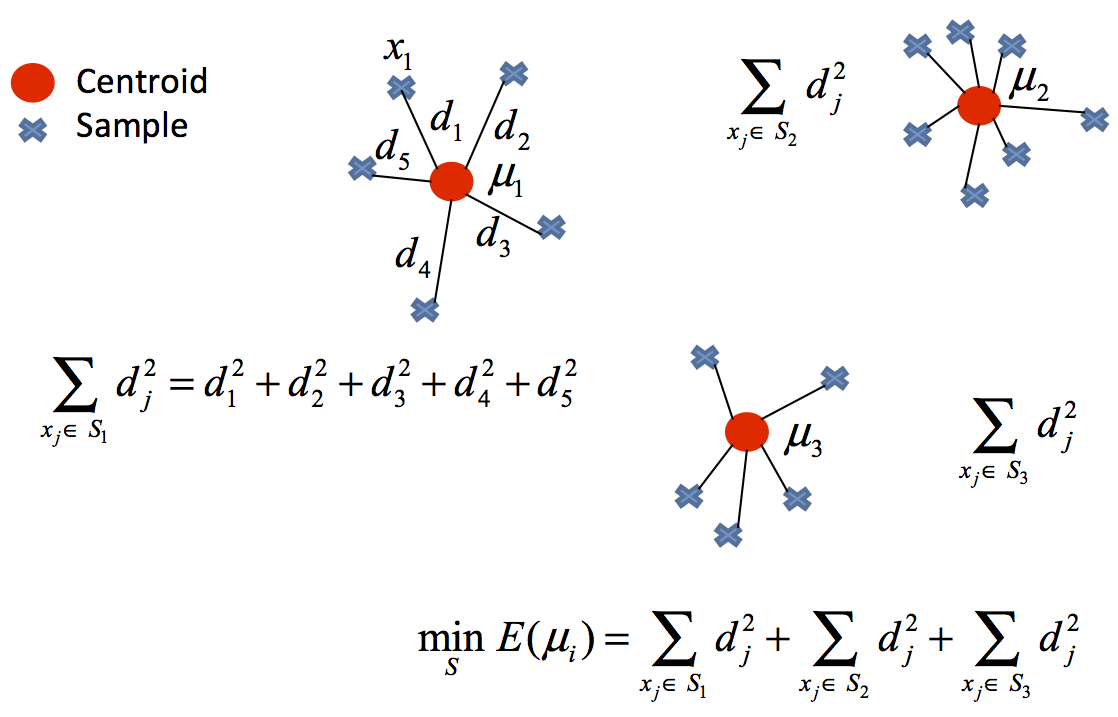

In [45]:
Image("inertia_sum_of_squares.png")

In [47]:
# total inertia of all the centroids
kmeans.inertia_

942.574352846782

In [52]:
clusters = kmeans.predict(X_prep)
clusters

array([7, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 1,
       7, 5, 5, 5, 7, 7, 5, 7, 5, 7, 7, 5, 5, 7, 5, 5, 7, 7, 7, 1, 7, 1,
       7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 7, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 6, 0, 1, 2, 5, 1, 0, 0, 0, 6, 1, 2, 1, 2, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 6, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 5, 2, 1, 1, 2, 1, 2, 2, 2, 0, 4,
       4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4,
       4, 4], dtype=int32)

In [56]:
pd.Series(clusters).value_counts().sort_index()

0    13
1    23
2    34
3    22
4    25
5    19
6     3
7    39
dtype: int64

In [57]:
kmeans.cluster_centers_

array([[-4.84417110e-01, -7.00351821e-01, -1.21040122e+00,
        -8.00011646e-01, -1.65489870e-01, -7.62520085e-01,
        -7.59964629e-01,  3.19770238e-01, -1.17142800e+00,
        -6.09430162e-01,  2.08957908e-01, -8.50932705e-01,
        -5.57436408e-01],
       [-7.35477484e-01,  8.13356482e-02, -4.06837479e-01,
        -7.94280943e-02, -5.28297935e-01,  7.54657455e-01,
         6.68152851e-01, -7.01603842e-01,  7.77721643e-01,
        -6.80753574e-01,  3.25934043e-01,  6.16637895e-01,
        -5.92945111e-01],
       [-1.05800485e+00, -4.04894729e-01, -1.96912466e-01,
         6.33883161e-01, -7.33550744e-01, -3.90866171e-01,
        -1.53109902e-01,  3.61882301e-01, -1.96365437e-01,
        -1.02690913e+00,  4.30568144e-01,  3.25804721e-01,
        -8.84574695e-01],
       [ 6.77376912e-02,  1.36609385e+00,  2.08791281e-01,
         5.61140326e-01, -3.93560477e-01, -1.05043553e+00,
        -1.40664557e+00,  1.24500923e+00, -1.08945987e+00,
         2.98906303e-01, -9.60007074e

In [60]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,5


<AxesSubplot:ylabel='Frequency'>

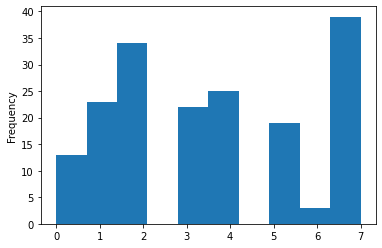

In [62]:
X_df['cluster'].plot(kind='hist')

```python
def get_inertia(n_clusters):
    kmeans = KMeans(n_clusters=8, random_state=1234)
    
    # train your model here
    # calculate an inertia
    reture kmeans.inertia
    
cluster_range = range(1,11)

dct = {cluster_number:get_inertia(cluster_number) for cluster_number in cluster_range}

```

Text(0, 0.5, 'inertia')

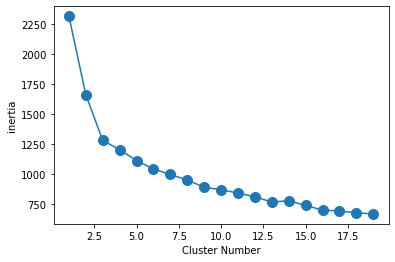

In [81]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,20)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

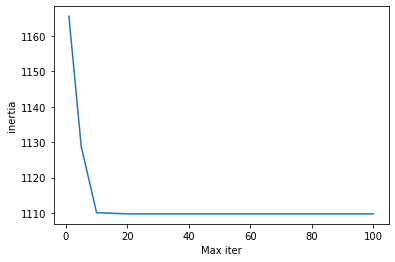

In [80]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

* **Inertia**, Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

* **Silhouette score**, (discuss later), -1 to 1

* Sci-kit learn explanation how to read [silhouette plots](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
* Inertia was the metric that KMeans used to find the optimum centroids
* but it does **not have a limited range** (as the Mean Squared Error has, it's in units of the distances)
* ranges from 0 to ...
* a score that is **not really comparable**
* what Silhouette score does: **how similar is an observation to its own cluster compared to other clusters**
* $S_i = \frac{(b_i - a_i)}{\text{max}(a_i,b_i)}$
    * `a`: mean intra-cluster distance (the average distance between the i-th observation and every other observation in the cluster where i belongs to)
    * `b`: the mean **nearest** inter cluster distance (the average distance between the i_th observation of the nearest cluster that i is **not part of**)
    
* The **silhouette score for the whole model** is the **average** of all the silhouette scores of each instance.

Well separated clusters:
* `a` - the mean intra cluster distance is relatively small compared to
* `b` - the mean inter cluster distance that the points are not part of
* that means $S = (b - a) / max(a,b)$ approaches 1

Not so well separated clusters:
* `a` - the mean intra cluster distance is not so small (relatively) compared to
* `b` - the mean inter cluster distance that the points are not part of
* that means $S = (b - a) / max(a,b)$ becomes smaller and smaller (approaches 0 when b=a)
* S becomes negative for a point, which is not (yet) in the right cluster (too less iterations? play with tolerance. Or random effect - increase n_init?)

In [84]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0, 0.5, 'silhouette score')

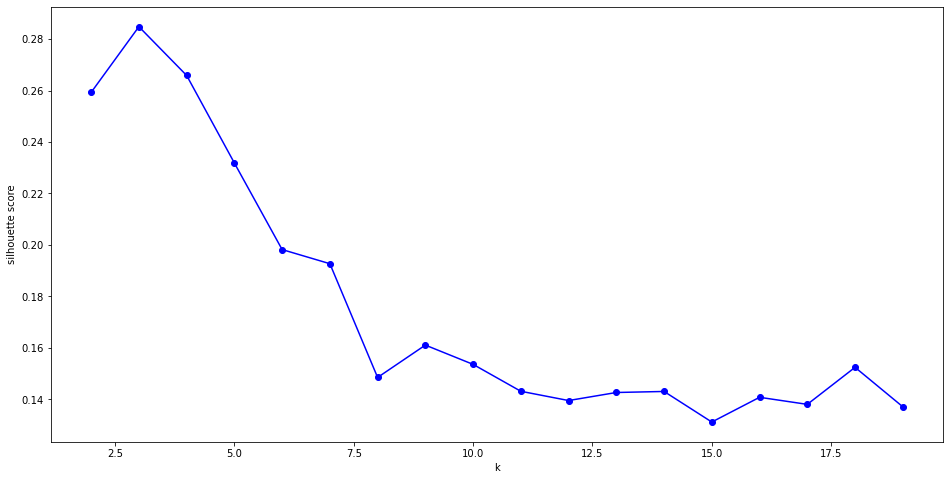

In [88]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [90]:
""" doesnt work, check the environment

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_prep)
"""

" doesnt work, check the environment\n\nfrom yellowbrick.cluster import SilhouetteVisualizer\n\nfig, ax = plt.subplots(2, 2, figsize=(15,8))\nfor k in [2, 3, 4, 5]:\n    '''\n    Create KMeans instance for different number of clusters\n    '''\n    km = KMeans(n_clusters=k,\n                random_state=1234)\n    q, mod = divmod(k, 2)\n    '''\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '''\n    \n    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])\n    visualizer.fit(X_prep)\n"

# LEt's visualize the result!

In [93]:
kmeans = KMeans(n_clusters=3,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [94]:
clusters.shape

(178,)

In [95]:
wines_clustered = pd.DataFrame(X_prep, columns=data['feature_names'])

In [96]:
wines_clustered['cluster_id'] = clusters

In [97]:
wines_clustered.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_id
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [99]:
wines_clustered['cluster_id'].value_counts()

2    65
0    62
1    51
Name: cluster_id, dtype: int64

In [100]:
kmeans.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [101]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=data['feature_names'])

In [102]:
cluster_centers_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


In [103]:
cluster_centers_df['cluster_id'] = range(0,3)

In [104]:
cluster_centers_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_id
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185,0
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088,1
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846,2


In [107]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['alcohol', 'color_intensity', 'cluster_id']]

# this cointains my datapoints with the determined
wines_clustered_sub_df= wines_clustered[['alcohol', 'color_intensity', 'cluster_id']]

In [108]:
cluster_center_sub_df

,alcohol,color_intensity,cluster_id
0,0.835232,0.171063,0
1,0.164907,0.941539,1
2,-0.926072,-0.901914,2


In [109]:
wines_clustered_sub_df

,alcohol,color_intensity,cluster_id
0,1.518613,0.251717,0
1,0.246290,-0.293321,0
2,0.196879,0.269020,0
3,1.691550,1.186068,0
4,0.295700,-0.319276,0
...,...,...,...
173,0.876275,1.142811,1
174,0.493343,0.969783,1
175,0.332758,2.224236,1
176,0.209232,1.834923,1


<AxesSubplot:xlabel='alcohol', ylabel='color_intensity'>

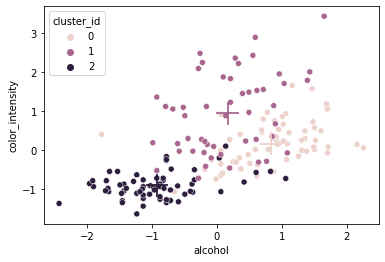

In [114]:
import seaborn as sns

sns.scatterplot(data=wines_clustered_sub_df,
               x='alcohol',
               y='color_intensity',
               hue='cluster_id')

# plot centroids
sns.scatterplot(data=cluster_center_sub_df,
               x="alcohol",
               y="color_intensity",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )

In [117]:
wines2 = wines_clustered[wines_clustered['cluster_id']==2]

In [122]:
X['cluster_id'] = wines_clustered['cluster_id']

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

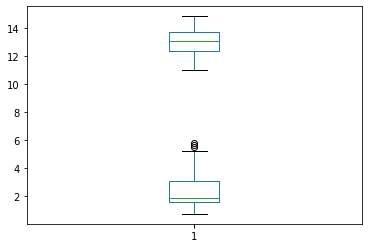

In [125]:
for col in X.columns:
    X[col].plot(kind='box')